## Process Mining with Python: An Advanced Example   
#### Basics and Integrations to Other Data Science Libraries

The interest in combining Machine Learning and Process Mining has seen increasing growth in the last few years.

<br>
   
Data:
+ [Data_Receipt.xes](https://github.com/pm4py/pm4py-core/tree/release/notebooks/data)

---
Source:
+ [ML4PM 2022 3rd Intl. Workshop on leveraging Machine Learning in Process Mining](https://ml4pm2022.di.unimi.it/)
+ [Process Mining Conference 2022](https://icpmconference.org/2022/program/)


---
+ 24.10.2022 initial version of [Sebastiaan J. van Zelst](https://github.com/pm4py/pm4py-core/blob/release/notebooks/5_advanced_examples.ipynb) (with credits to Alessandro Berti)
+ 30.03.2023 v1 dbe --- adapted version for BINA FS23  
+ 08.01.2024 v2 dbe --- minor corrections for CAS BPE16   

---

## Process Mining Overview (Schematic)
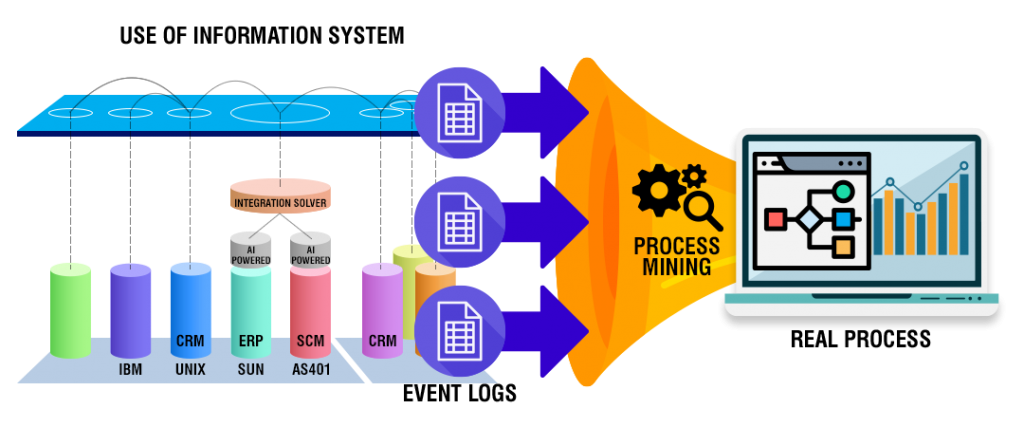


## A) Installing pm4py first

In [ ]:
!pip install pm4py

---   
##  B) Load, Transform and Inspect Data

In [ ]:
# check working directory

sample_data/


In [ ]:
import pm4py
log = pm4py.read_xes('/content/sample_data/Data_Receipt.xes')

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
# convert log event data into a pandas dataframe
df = pm4py.convert_to_dataframe(log)

# format the timestamp column
df['time:timestamp']=pd.to_datetime(df['time:timestamp'], utc=True)
df.head()

org:group concept:instance org:resource                        concept:name  \
0   Group 1       task-42933   Resource21             Confirmation of receipt   
1   Group 4       task-42935   Resource10   T02 Check confirmation of receipt   
2   Group 1       task-42957   Resource21  T03 Adjust confirmation of receipt   
3   Group 4       task-47958   Resource21   T02 Check confirmation of receipt   
4     EMPTY       task-43021   Resource30             Confirmation of receipt   

                    time:timestamp lifecycle:transition  \
0 2011-10-11 13:45:40.276000+00:00             complete   
1 2011-10-12 08:26:25.398000+00:00             complete   
2 2011-11-24 15:36:51.302000+00:00             complete   
3 2011-11-24 15:37:16.553000+00:00             complete   
4 2011-10-18 13:46:39.679000+00:00             complete   

                    case:startdate case:responsible  \
0 2011-10-11 13:42:22.688000+00:00       Resource21   
1 2011-10-11 13:42:22.688000+00:00       Resource21   
2 2011-10-11 13:42:22.688000+00:00       Resource21   
3 2011-10-11 13:42:22.688000+00:00       Resource21   
4 2011-10-11 01:06:40.020000+00:00       Resource04   

              case:enddate_planned case:department case:group  \
0 2011-12-06 13:41:31.788000+00:00         General    Group 2   
1 2011-12-06 13:41:31.788000+00:00         General    Group 2   
2 2011-12-06 13:41:31.788000+00:00         General    Group 2   
3 2011-12-06 13:41:31.788000+00:00         General    Group 2   
4 2011-12-06 01:06:40.010000+00:00         General    Group 5   

  case:concept:name                    case:deadline case:channel  \
0        case-10011 2011-12-06 13:41:31.788000+00:00     Internet   
1        case-10011 2011-12-06 13:41:31.788000+00:00     Internet   
2        case-10011 2011-12-06 13:41:31.788000+00:00     Internet   
3        case-10011 2011-12-06 13:41:31.788000+00:00     Internet   
4        case-10017        2011-12-06 01:06:40+00:00     Internet   

                      case:enddate  
0                              NaT  
1                              NaT  
2                              NaT  
3                              NaT  
4 2011-10-18 13:56:55.943000+00:00

In [ ]:
# Inspect a single case
case10017 = df[df['case:concept:name'] =='case-10017']
case10017

org:group concept:instance org:resource  \
4      EMPTY       task-43021   Resource30   
5    Group 1       task-43672   Resource30   
6    Group 4       task-43671   Resource30   
7    Group 1       task-43674   Resource30   
8    Group 4       task-43675   Resource30   
9    Group 1       task-43673   Resource30   
10   Group 1       task-43676   Resource30   
11   Group 4       task-43679   Resource30   
12   Group 1       task-43686       admin2   

                                  concept:name  \
4                      Confirmation of receipt   
5       T06 Determine necessity of stop advice   
6            T02 Check confirmation of receipt   
7           T03 Adjust confirmation of receipt   
8            T02 Check confirmation of receipt   
9   T10 Determine necessity to stop indication   
10          T03 Adjust confirmation of receipt   
11           T02 Check confirmation of receipt   
12          T03 Adjust confirmation of receipt   

                     time:timestamp lifecycle:transition  \
4  2011-10-18 13:46:39.679000+00:00             complete   
5  2011-10-18 13:47:06.950000+00:00             complete   
6  2011-10-18 13:47:26.235000+00:00             complete   
7  2011-10-18 13:47:41.811000+00:00             complete   
8  2011-10-18 13:47:57.979000+00:00             complete   
9  2011-10-18 13:48:15.357000+00:00             complete   
10 2011-10-18 13:48:30.632000+00:00             complete   
11 2011-10-18 13:51:01.525000+00:00             complete   
12 2011-10-18 13:56:57.603000+00:00             complete   

                     case:startdate case:responsible  \
4  2011-10-11 01:06:40.020000+00:00       Resource04   
5  2011-10-11 01:06:40.020000+00:00       Resource04   
6  2011-10-11 01:06:40.020000+00:00       Resource04   
7  2011-10-11 01:06:40.020000+00:00       Resource04   
8  2011-10-11 01:06:40.020000+00:00       Resource04   
9  2011-10-11 01:06:40.020000+00:00       Resource04   
10 2011-10-11 01:06:40.020000+00:00       Resource04   
11 2011-10-11 01:06:40.020000+00:00       Resource04   
12 2011-10-11 01:06:40.020000+00:00       Resource04   

               case:enddate_planned case:department case:group  \
4  2011-12-06 01:06:40.010000+00:00         General    Group 5   
5  2011-12-06 01:06:40.010000+00:00         General    Group 5   
6  2011-12-06 01:06:40.010000+00:00         General    Group 5   
7  2011-12-06 01:06:40.010000+00:00         General    Group 5   
8  2011-12-06 01:06:40.010000+00:00         General    Group 5   
9  2011-12-06 01:06:40.010000+00:00         General    Group 5   
10 2011-12-06 01:06:40.010000+00:00         General    Group 5   
11 2011-12-06 01:06:40.010000+00:00         General    Group 5   
12 2011-12-06 01:06:40.010000+00:00         General    Group 5   

   case:concept:name             case:deadline case:channel  \
4         case-10017 2011-12-06 01:06:40+00:00     Internet   
5         case-10017 2011-12-06 01:06:40+00:00     Internet   
6         case-10017 2011-12-06 01:06:40+00:00     Internet   
7         case-10017 2011-12-06 01:06:40+00:00     Internet   
8         case-10017 2011-12-06 01:06:40+00:00     Internet   
9         case-10017 2011-12-06 01:06:40+00:00     Internet   
10        case-10017 2011-12-06 01:06:40+00:00     Internet   
11        case-10017 2011-12-06 01:06:40+00:00     Internet   
12        case-10017 2011-12-06 01:06:40+00:00     Internet   

                       case:enddate  
4  2011-10-18 13:56:55.943000+00:00  
5  2011-10-18 13:56:55.943000+00:00  
6  2011-10-18 13:56:55.943000+00:00  
7  2011-10-18 13:56:55.943000+00:00  
8  2011-10-18 13:56:55.943000+00:00  
9  2011-10-18 13:56:55.943000+00:00  
10 2011-10-18 13:56:55.943000+00:00  
11 2011-10-18 13:56:55.943000+00:00  
12 2011-10-18 13:56:55.943000+00:00

---   
## C) Data Exploration with [Pandas](https://pandas.pydata.org/)

#### Number of Cases

In [ ]:
df['case:concept:name'].nunique()

1434

#### Activity Ocurrences

In [ ]:
df["concept:name"].value_counts()

Confirmation of receipt                                  1434
T06 Determine necessity of stop advice                   1416
T02 Check confirmation of receipt                        1368
T04 Determine confirmation of receipt                    1307
T05 Print and send confirmation of receipt               1300
T10 Determine necessity to stop indication               1283
T03 Adjust confirmation of receipt                         55
T07-1 Draft intern advice aspect 1                         45
T11 Create document X request unlicensed                   44
T12 Check document X request unlicensed                    41
T15 Print document X request unlicensed                    39
T14 Determine document X request unlicensed                39
T07-2 Draft intern advice aspect 2                         32
T07-5 Draft intern advice aspect 5                         27
T17 Check report Y to stop indication                      26
T20 Print report Y to stop indication                      20
T19 Dete

#### Activities in Cases

In [ ]:
df.groupby(["case:concept:name", "concept:name"]).first().reset_index()["concept:name"].value_counts()

Confirmation of receipt                                  1434
T02 Check confirmation of receipt                        1316
T06 Determine necessity of stop advice                   1309
T04 Determine confirmation of receipt                    1303
T05 Print and send confirmation of receipt               1300
T10 Determine necessity to stop indication               1283
T11 Create document X request unlicensed                   44
T12 Check document X request unlicensed                    40
T15 Print document X request unlicensed                    39
T14 Determine document X request unlicensed                39
T03 Adjust confirmation of receipt                         37
T07-1 Draft intern advice aspect 1                         29
T20 Print report Y to stop indication                      20
T19 Determine report Y to stop indication                  20
T17 Check report Y to stop indication                      20
T16 Report reasons to hold request                         20
T07-5 Dr

#### Start Activities

In [ ]:
df.groupby("case:concept:name").first()["concept:name"].value_counts()

Confirmation of receipt    1434
Name: concept:name, dtype: int64

#### End Activities

In [ ]:
df.groupby("case:concept:name").last()["concept:name"].value_counts()

T10 Determine necessity to stop indication    828
T05 Print and send confirmation of receipt    400
Confirmation of receipt                       116
T15 Print document X request unlicensed        39
T06 Determine necessity of stop advice         16
T20 Print report Y to stop indication          15
T02 Check confirmation of receipt               8
T11 Create document X request unlicensed        4
T03 Adjust confirmation of receipt              2
T04 Determine confirmation of receipt           2
T07-1 Draft intern advice aspect 1              1
T13 Adjust document X request unlicensed        1
T07-5 Draft intern advice aspect 5              1
T07-2 Draft intern advice aspect 2              1
Name: concept:name, dtype: int64

---   
## D) Data Exploration and Visualization with [PM4PY](https://pm4py.fit.fraunhofer.de/)

### D1) Distribution Analysis

#### Events per Day

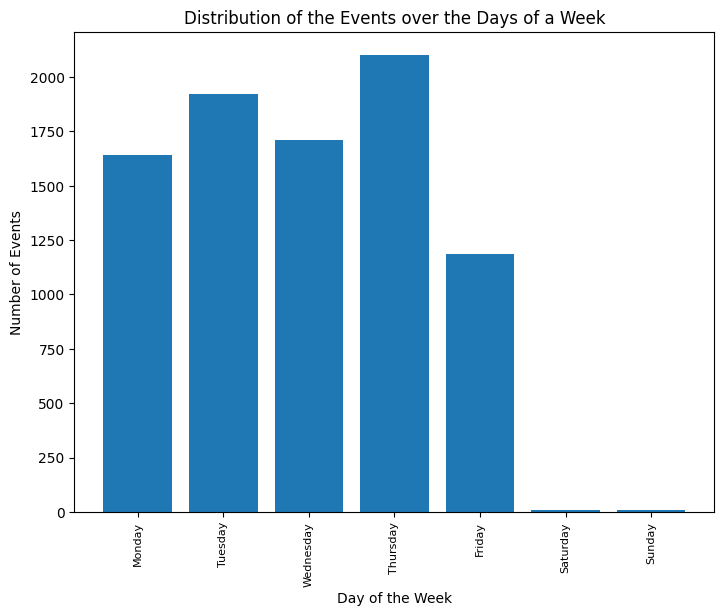

In [ ]:
pm4py.view_events_distribution_graph(df, distr_type="days_week") # Matplotlib inside!

#### Events per Hour

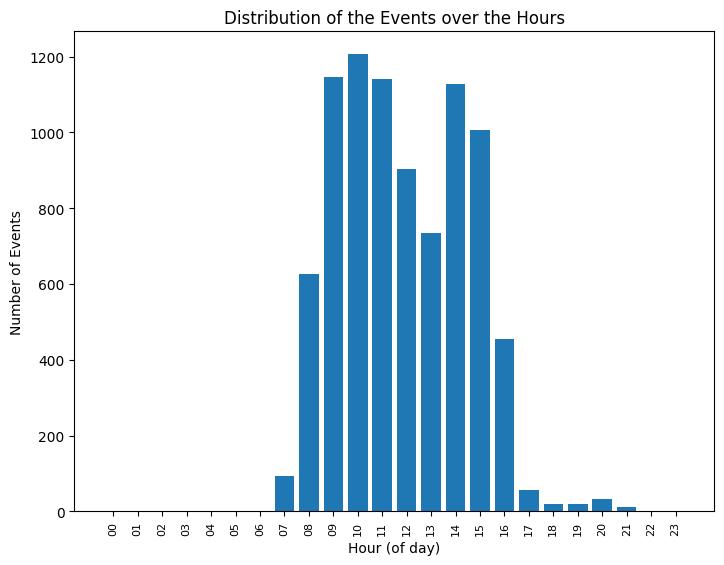

In [ ]:
pm4py.view_events_distribution_graph(df, distr_type="hours") # Matplotlib inside!

#### Event Distribution Plot

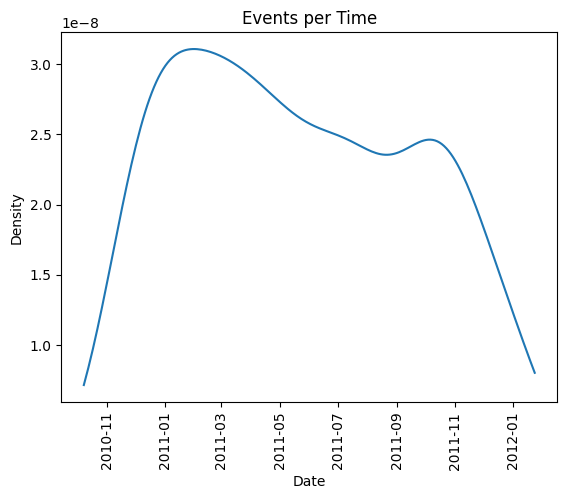

In [ ]:
pm4py.view_events_per_time_graph(log) # Matplotlib inside!

#### Case Duration Distribution

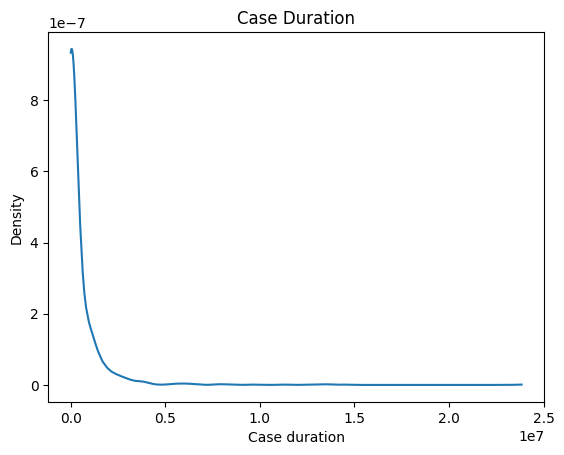

In [ ]:
pm4py.view_case_duration_graph(log) # Matplotlib inside!

---  
### D2) Discovering Process Maps  
#### Fun with Process Maps and Graph Theory

Let $L{\in}\mathcal{B}(\Sigma^*)$ be an event log (where $\Sigma$ represents all possible activities, and $\mathcal{B}(\Sigma^*)$ represents all *multisets* over sequences of activities)

Given $a,b{\in}\Sigma$, we write $a{>_{L}}b$, iff $\exists{\sigma{\in}L}\left(\exists{1{\leq}i{<}|\sigma|}\left(\sigma(i){=}a{\wedge}\sigma(i{+}1){=}b\right)\right)$

In [ ]:
dfg = pm4py.discover_dfg(df)
print(dfg[0]) # graph structure

{('Confirmation of receipt', 'T02 Check confirmation of receipt'): 1079, ('Confirmation of receipt', 'T06 Determine necessity of stop advice'): 239, ('T02 Check confirmation of receipt', 'T03 Adjust confirmation of receipt'): 43, ('T02 Check confirmation of receipt', 'T04 Determine confirmation of receipt'): 1119, ('T02 Check confirmation of receipt', 'T05 Print and send confirmation of receipt'): 1, ('T02 Check confirmation of receipt', 'T06 Determine necessity of stop advice'): 178, ('T02 Check confirmation of receipt', 'T07-1 Draft intern advice aspect 1'): 2, ('T02 Check confirmation of receipt', 'T07-2 Draft intern advice aspect 2'): 1, ('T02 Check confirmation of receipt', 'T07-5 Draft intern advice aspect 5'): 1, ('T02 Check confirmation of receipt', 'T10 Determine necessity to stop indication'): 15, ('T03 Adjust confirmation of receipt', 'T02 Check confirmation of receipt'): 51, ('T03 Adjust confirmation of receipt', 'T06 Determine necessity of stop advice'): 2, ('T04 Determine

#### Start Activities

In [ ]:
print(dfg[1]) # start activities

{'Confirmation of receipt': 1434}


#### End Activities

In [ ]:
print(dfg[2]) # end activities

{'T10 Determine necessity to stop indication': 828, 'T05 Print and send confirmation of receipt': 400, 'Confirmation of receipt': 116, 'T15 Print document X request unlicensed': 39, 'T06 Determine necessity of stop advice': 16, 'T20 Print report Y to stop indication': 15, 'T02 Check confirmation of receipt': 8, 'T11 Create document X request unlicensed': 4, 'T03 Adjust confirmation of receipt': 2, 'T04 Determine confirmation of receipt': 2, 'T07-1 Draft intern advice aspect 1': 1, 'T13 Adjust document X request unlicensed': 1, 'T07-5 Draft intern advice aspect 5': 1, 'T07-2 Draft intern advice aspect 2': 1}


#### Visualizing the Process Map

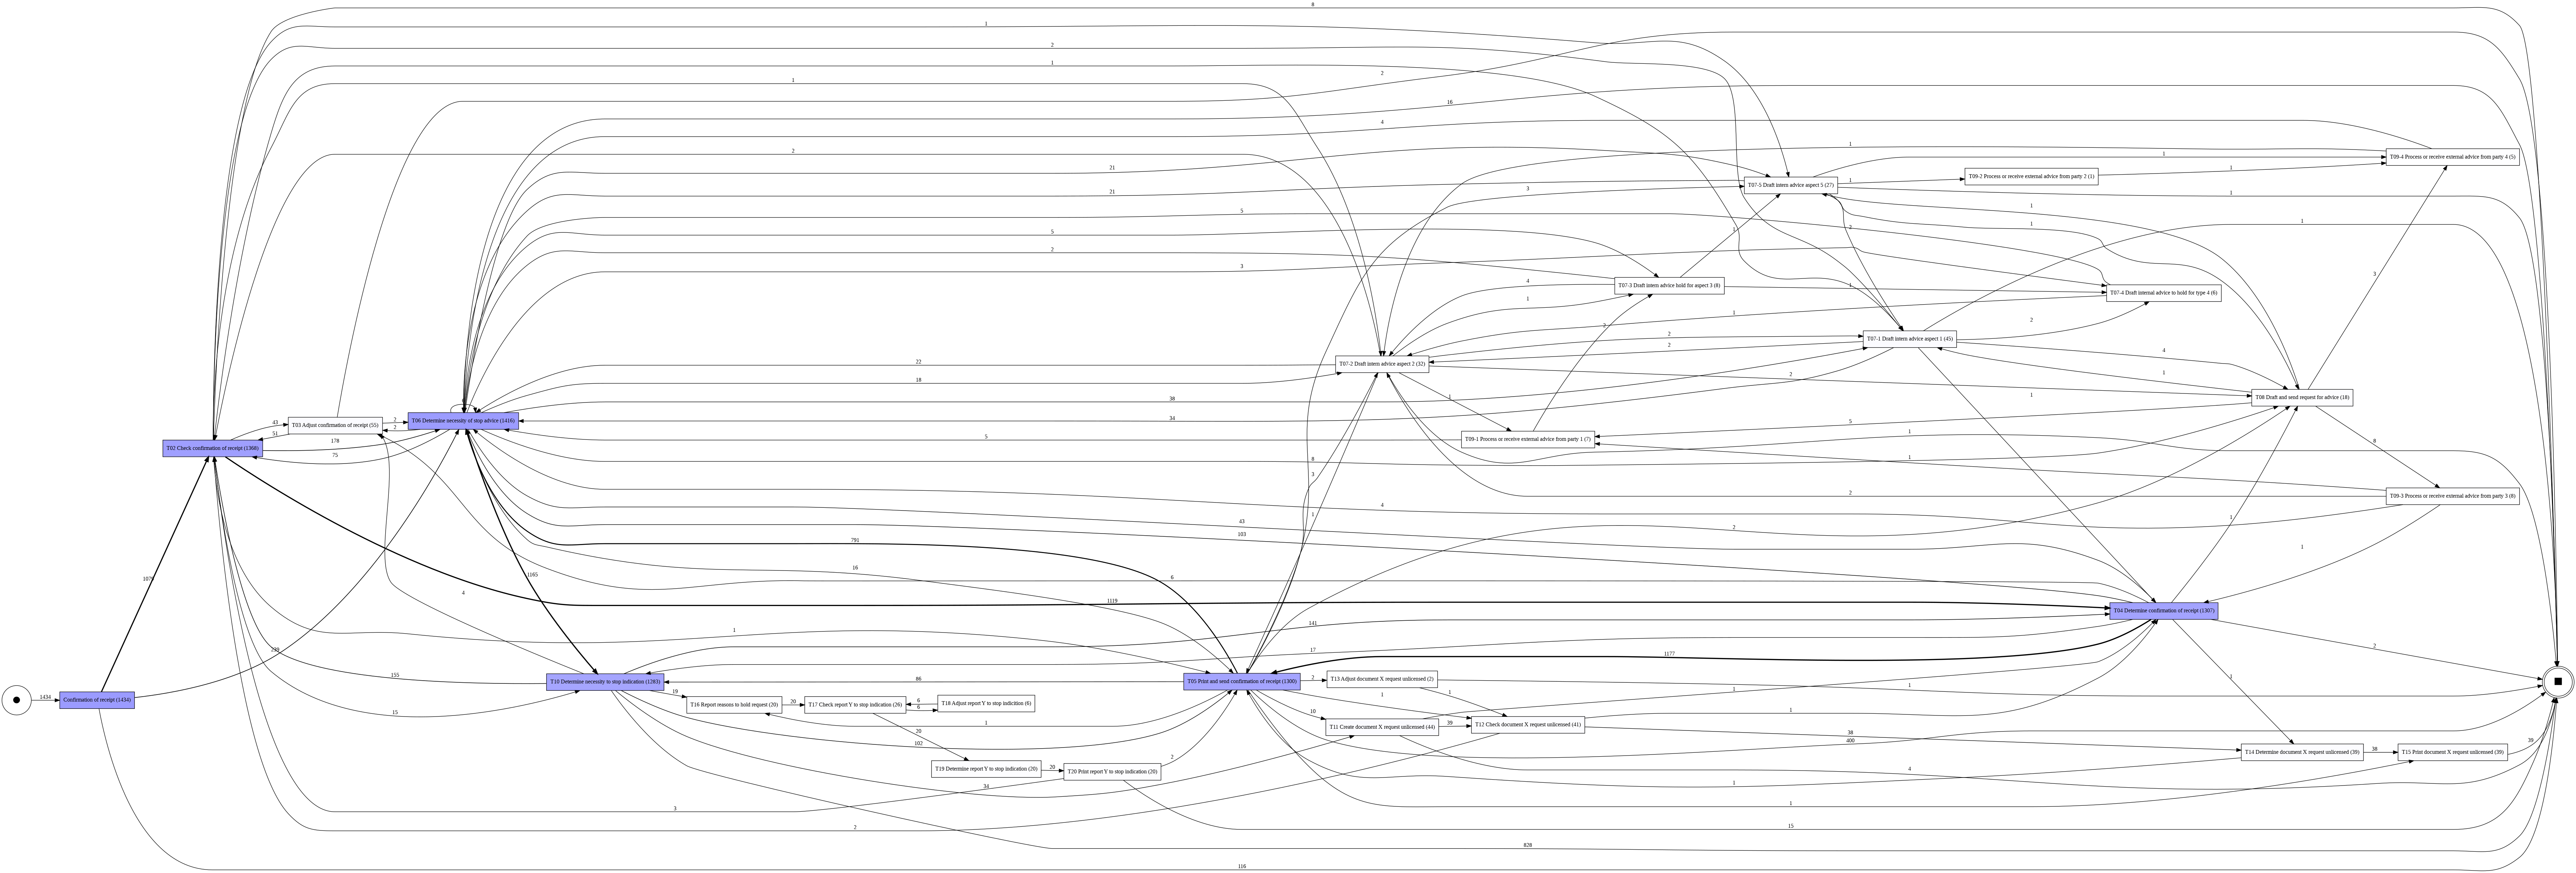

In [ ]:
pm4py.view_dfg(dfg[0], dfg[1], dfg[2])

In [ ]:
# Exporting the DFG process map
pm4py.save_vis_dfg (dfg[0], dfg[1], dfg[2], 'Plot_DFG_ProcessMap.png')

''

---  
### D4) Graph Theory for Process Maps using [networkX](https://networkx.org/)

#### Converting the Process Map

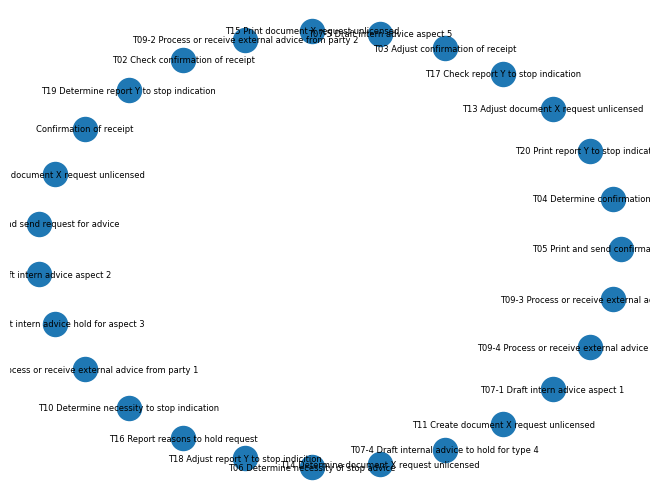

In [ ]:
%matplotlib inline
import networkx as nx
import itertools as it
G = nx.DiGraph()
alphabet = set(list(it.chain.from_iterable([[a,b] for (a,b) in dfg[0]]))).union(dfg[1].keys()).union(dfg[2].keys())
G.add_nodes_from(alphabet) # adding nodes
nx.draw_circular(G, font_size=6, with_labels = True)

#### Adding Arcs

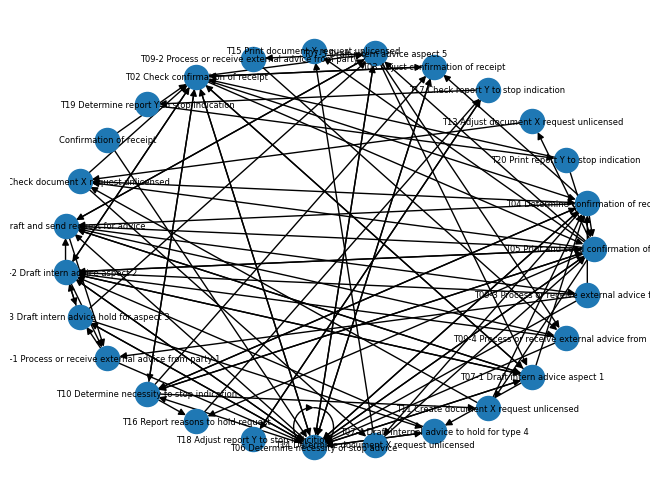

In [ ]:
G.add_edges_from(dfg[0].keys())
nx.draw_circular(G, font_size=6, with_labels = True)

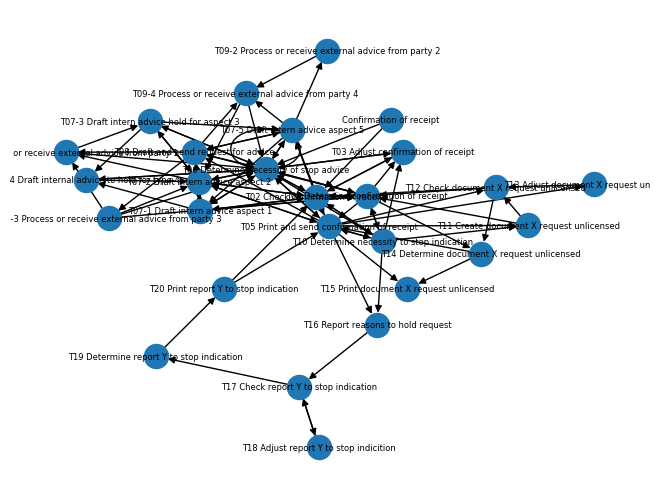

In [ ]:
nx.draw_kamada_kawai(G, font_size=6, with_labels = True)

In [ ]:
# Exporting the network graph
# nx.(G, font_size=6, with_labels = True)

### Degree of Vertices

The *indegree* of a vertex $v$, i.e., $deg^-(v)$, represents the number of *incoming arcs* of $v$ in $G$. ($deg^+(v)$ is defined symmetrically)

In [ ]:
sorted([(n, i) for (n,i) in G.in_degree()], key=lambda t: t[1], reverse=True)

[('T06 Determine necessity of stop advice', 14),
 ('T02 Check confirmation of receipt', 8),
 ('T07-2 Draft intern advice aspect 2', 8),
 ('T05 Print and send confirmation of receipt', 7),
 ('T04 Determine confirmation of receipt', 7),
 ('T08 Draft and send request for advice', 6),
 ('T07-5 Draft intern advice aspect 5', 5),
 ('T07-1 Draft intern advice aspect 1', 5),
 ('T03 Adjust confirmation of receipt', 4),
 ('T10 Determine necessity to stop indication', 4),
 ('T12 Check document X request unlicensed', 3),
 ('T07-3 Draft intern advice hold for aspect 3', 3),
 ('T09-1 Process or receive external advice from party 1', 3),
 ('T07-4 Draft internal advice to hold for type 4', 3),
 ('T09-4 Process or receive external advice from party 4', 3),
 ('T17 Check report Y to stop indication', 2),
 ('T15 Print document X request unlicensed', 2),
 ('T16 Report reasons to hold request', 2),
 ('T14 Determine document X request unlicensed', 2),
 ('T11 Create document X request unlicensed', 2),
 ('T20 

### Dominator of a Graph

A vertex $d$ dominates a vertex $v$ in a graph $G$ iff every path from some given *entry node* $s$ visits $d$

In [ ]:
nx.immediate_dominators(G, 'Confirmation of receipt')

{'Confirmation of receipt': 'Confirmation of receipt',
 'T02 Check confirmation of receipt': 'Confirmation of receipt',
 'T03 Adjust confirmation of receipt': 'Confirmation of receipt',
 'T06 Determine necessity of stop advice': 'Confirmation of receipt',
 'T04 Determine confirmation of receipt': 'Confirmation of receipt',
 'T05 Print and send confirmation of receipt': 'Confirmation of receipt',
 'T13 Adjust document X request unlicensed': 'T05 Print and send confirmation of receipt',
 'T10 Determine necessity to stop indication': 'Confirmation of receipt',
 'T16 Report reasons to hold request': 'Confirmation of receipt',
 'T17 Check report Y to stop indication': 'T16 Report reasons to hold request',
 'T19 Determine report Y to stop indication': 'T17 Check report Y to stop indication',
 'T20 Print report Y to stop indication': 'T19 Determine report Y to stop indication',
 'T18 Adjust report Y to stop indicition': 'T17 Check report Y to stop indication',
 'T11 Create document X request 

### Centrality of a Node

In [ ]:
sorted(nx.degree_centrality(G).items(), key=lambda t: t[1], reverse=True)

[('T06 Determine necessity of stop advice', 1.0),
 ('T05 Print and send confirmation of receipt', 0.6538461538461539),
 ('T02 Check confirmation of receipt', 0.6153846153846154),
 ('T07-2 Draft intern advice aspect 2', 0.576923076923077),
 ('T04 Determine confirmation of receipt', 0.5),
 ('T08 Draft and send request for advice', 0.42307692307692313),
 ('T07-1 Draft intern advice aspect 1', 0.42307692307692313),
 ('T07-5 Draft intern advice aspect 5', 0.38461538461538464),
 ('T10 Determine necessity to stop indication', 0.38461538461538464),
 ('T07-3 Draft intern advice hold for aspect 3', 0.2692307692307693),
 ('T03 Adjust confirmation of receipt', 0.23076923076923078),
 ('T12 Check document X request unlicensed', 0.23076923076923078),
 ('T09-1 Process or receive external advice from party 1',
  0.19230769230769232),
 ('T07-4 Draft internal advice to hold for type 4', 0.19230769230769232),
 ('T09-4 Process or receive external advice from party 4',
  0.19230769230769232),
 ('T09-3 Proce

## E) Discovering Process Models

### E1) Discovering a **BPMN Model** (Raw Data)

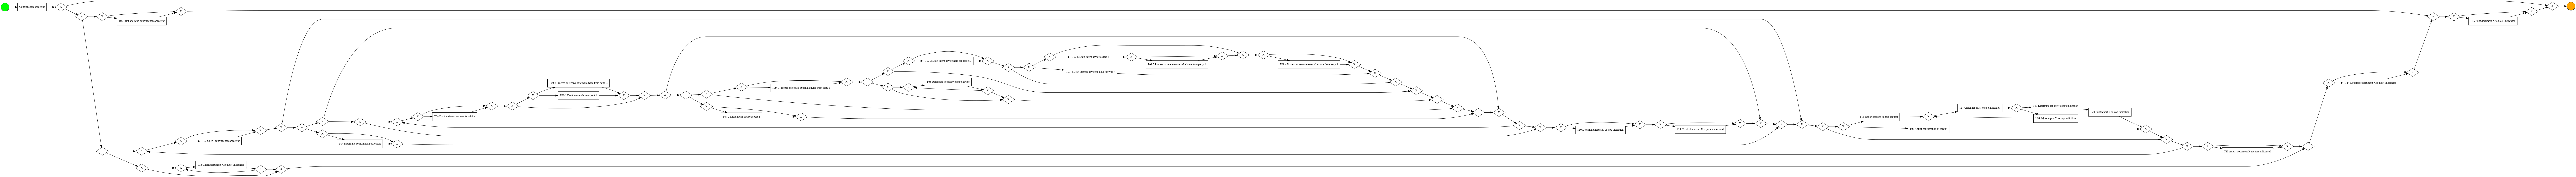

In [ ]:
bpmn_1 = pm4py.discover_bpmn_inductive(df)
pm4py.view_bpmn(bpmn_1)

In [ ]:
# Export the BPNM process graph
pm4py.save_vis_bpmn(bpmn_1,'Plot_BPMN-Model1.png')

''

### E2) Discovering a **BPMN Model** (Internal Filtering)

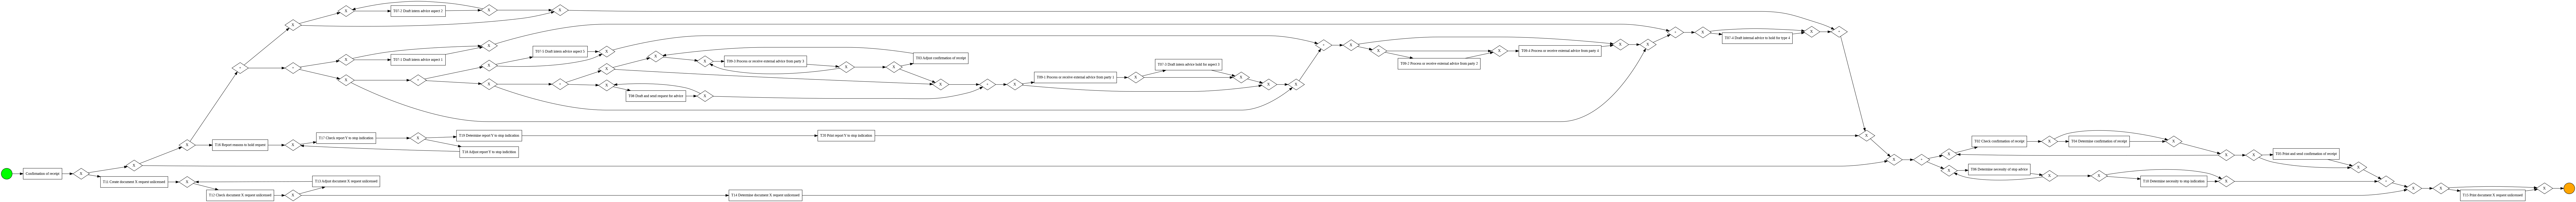

In [ ]:
bpmn_2 = pm4py.discover_bpmn_inductive(df, noise_threshold=0.1)
pm4py.view_bpmn(bpmn_2)

In [ ]:
# Export the BPNM process graph
pm4py.save_vis_bpmn(bpmn_2,'Plot_BPMN-Model2.png')

''

In [ ]:
# Export the BPMN process model
pm4py.write_bpmn(bpmn_2,'Data_BPMN-Model2')

### E3) Converting to a **Petri Net Model**

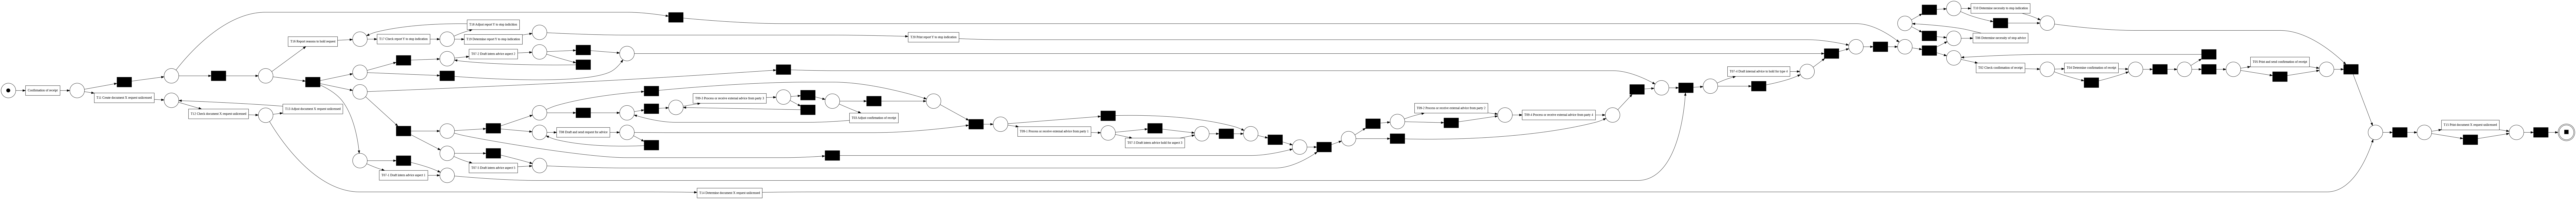

In [ ]:
pn, im, fm = pm4py.convert_to_petri_net(bpmn_2)
pm4py.view_petri_net(pn, im, fm)

In [ ]:
# Export the Petri Net process graph
pm4py.save_vis_petri_net(pn, im, fm,'Plot_PetriNet-Model2.png')

''

In [ ]:
# Export the Petri net process model (pnml)
# see https://xml.coverpages.org/WeberPNML200204.pdf and https://www.pnml.org/ for a detail description of the Petri net interchange format (pnml)
pm4py.write_pnml(pn, im, fm,'Data_PetriNet-Model1')

![](img/pm_generic.png)